In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing


In [465]:
from sklearn.linear_model import Lasso

In [466]:
housing = fetch_california_housing(as_frame=True)

In [467]:
df = housing.frame

In [468]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [469]:
#df.to_csv("california_housing.csv",index=False)

In [470]:
# One feature and target
X = df[["MedInc"]]
y = df["MedHouseVal"]

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [472]:
scaler = StandardScaler()

In [473]:
X_train_scaled = scaler.fit_transform(X_train)

In [474]:
X_test_scaled = scaler.transform(X_test)

In [475]:
model = Lasso(alpha=0.1, random_state=42, max_iter=10000)

In [476]:
model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, max_iter=10000, random_state=42)

In [477]:
y_pred = model.predict(X_test_scaled)

In [478]:
y_pred

array([1.26509764, 1.57693473, 1.92497734, ..., 4.0341053 , 1.66999798,
       1.95138867])

In [479]:
mse = mean_squared_error(y_test, y_pred)

In [480]:
print(f"MSE:  {mse:.2f}")

MSE:  0.72


In [481]:
rmse = np.sqrt(mse)

In [482]:
print(f"RMSE: {rmse:.2f}")

RMSE: 0.85


In [483]:
mae = mean_absolute_error(y_test, y_pred)

In [484]:
print(f"MAE:  {mae:.2f}")

MAE:  0.64


In [485]:
r2 = r2_score(y_test, y_pred)

In [486]:
print(f"R²:   {r2:.2f}")

R²:   0.45


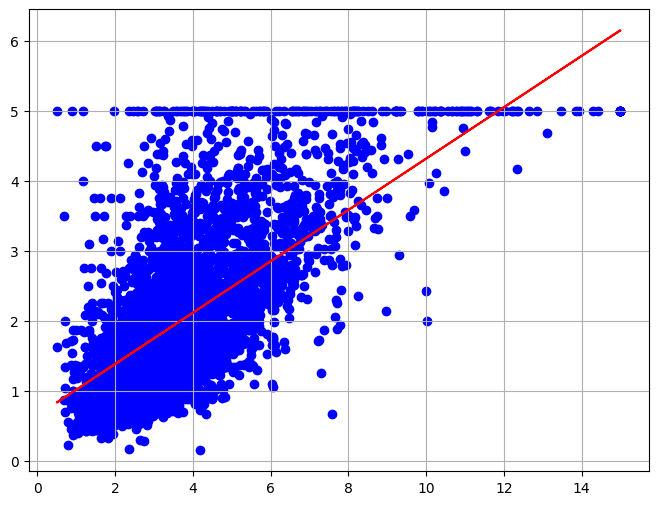

In [487]:
# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_pred, color="red")
plt.grid()
plt.show()